In [1]:
#Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
#Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Month,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [4]:
df.index = pd.to_datetime(df['Month'],format="%Y-%m")
df=df.drop('Month',axis=1)
df

,Saapuneet
Month,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


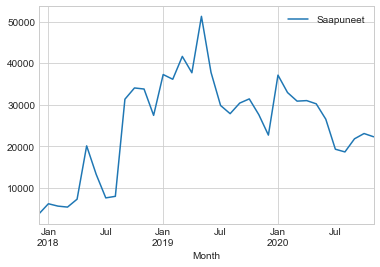

In [5]:
df.plot()

In [22]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä oN kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', freq='MS').fit()

In [23]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,1952.520927,-568.988211
2018-01-01,6185,3896.740717,2336.099848
2018-02-01,5615,6235.443258,-16.139272
2018-03-01,5381,6395.945176,-237.826424
2018-04-01,7284,6261.021793,1846.614261
2018-05-01,20116,7652.210455,13269.809677
2018-06-01,13238,17610.924339,-3731.890277
2018-07-01,7594,14961.356642,-6528.785583
2018-08-01,7968,10069.389038,-1173.895283


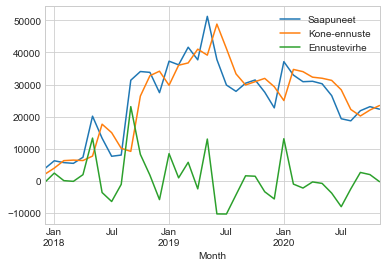

In [25]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [26]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,1952.520927,1761.479073
2018-01-01,6185,3896.740717,2288.259283
2018-02-01,5615,6235.443258,-620.443258
2018-03-01,5381,6395.945176,-1014.945176
2018-04-01,7284,6261.021793,1022.978207
2018-05-01,20116,7652.210455,12463.789545
2018-06-01,13238,17610.924339,-4372.924339
2018-07-01,7594,14961.356642,-7367.356642
2018-08-01,7968,10069.389038,-2101.389038


Text(0, 0.5, 'Ennustevirhe')

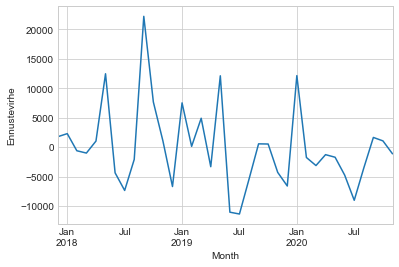

In [27]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

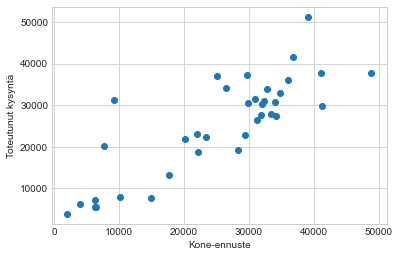

In [28]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [29]:
malli.summary()

Dep. Variable:,endog,No. Observations:,36
Model:,ExponentialSmoothing,SSE,1712589380.095
Optimized:,True,AIC,644.399
Trend:,Additive,BIC,650.733
Seasonal:,None,AICC,647.296
Seasonal Periods:,None,Date:,"Thu, 28 Jan 2021"
Box-Cox:,False,Time:,13:04:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7488564,alpha,True
smoothing_slope,0.000000,beta,True


In [31]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2020-07-01,19309,28350.314220,-9041.314220
2020-08-01,18656,22204.792708,-3548.792708
2020-09-01,21814,20172.381289,1641.618711
2020-10-01,23083,22026.842875,1056.157125
2020-11-01,22302,23442.877783,-1140.877783


In [32]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-12-01', periods = 12, freq = 'MS')

# Ennusteet 12 viikolle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-12-01,23213.648957
2021-01-01,23838.773803
2021-02-01,24463.898649
2021-03-01,25089.023495
2021-04-01,25714.148341
2021-05-01,26339.273187
2021-06-01,26964.398033
2021-07-01,27589.522879
2021-08-01,28214.647725
2021-09-01,28839.772571


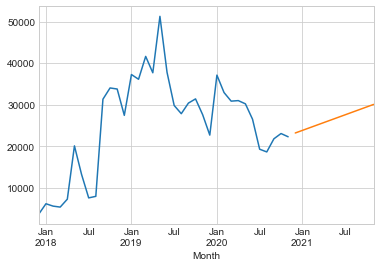

In [38]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [34]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,1952.520927,1761.479073
2018-01-01,6185,3896.740717,2288.259283
2018-02-01,5615,6235.443258,-620.443258
2018-03-01,5381,6395.945176,-1014.945176
2018-04-01,7284,6261.021793,1022.978207


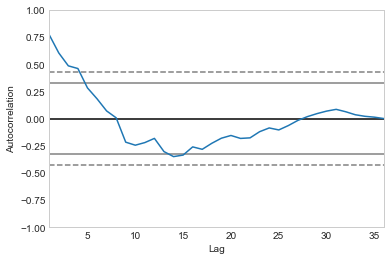

In [35]:
#Aikasarjassa on erotettavissa viiden kuukauden jaksoissa toistuva kausivaihtelu, jota kaksinkertainen 
#eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. 
#Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan 
#korrelaatio viiden kuukauden takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. 
#Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 0-5 
#kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat 
#tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 5 kohdalla korrelaatio on katkoviivan 
#yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Saapuneet'])

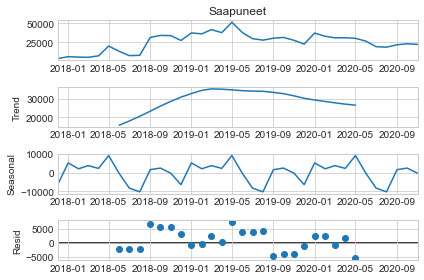

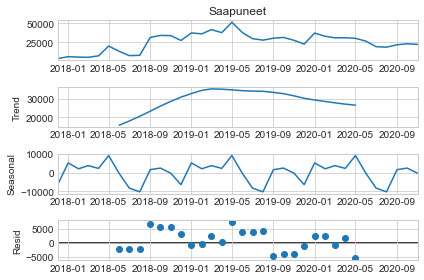

In [37]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Saapuneet']).plot()